# Iterative Closest Point

<img src="i/icp1.png" width=600>
<br>
<img src="i/icp2.png" width=600>
<br>

<img src="i/icp3.png" width=600>
<br>
<img src="i/icp4.png" width=600>


In [ ]:
# generate 2 lidar scans (i.e. 2 point clouds A, B)
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(1)

def generate_point_cloud(n=2, N=30):
    points = np.random.randn(n, N)
    return points 
A = generate_point_cloud()

def rigid_transform(A, rotate_by=5, t=[0.1, 0.15], noise_var=0.01):
    n, _ = A.shape
    theta = np.deg2rad(rotate_by)
    R = np.array([
        [np.cos(theta), -np.sin(theta)], 
        [np.sin(theta), np.cos(theta)]])
    
    t = np.array(t)
    B = R @ A + t.reshape(n, 1)

    noise = np.random.normal(loc=0, scale=noise_var, size=B.shape)
    B = B + noise
    
    return B, R, t  

B, R, t = rigid_transform(A)

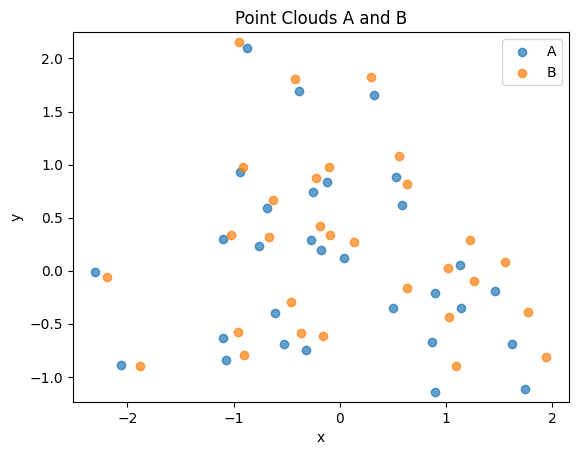

[[ 0.9961947  -0.08715574]
 [ 0.08715574  0.9961947 ]]
[0.1  0.15]


In [ ]:
def plot_clouds(A, B, A_hat=None):
    plt.figure()
    plt.scatter(A[0, :], A[1, :], label="A", alpha=0.7)
    plt.scatter(B[0, :], B[1, :], label="B", alpha = 0.9)
    if A_hat is not None:
        plt.scatter(A_hat[0, :], A_hat[0, :], alpha=0.5)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")

    plt.title("Point Clouds A and B")
    plt.legend()
    plt.show()

plot_clouds(A, B)
print(R)
print(t)